Name: Harshal Bondre

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
pageSize = 100
reviews = []


for i in range(1, pages +1):
  print(f"scrapping page {i}")

  url = f"{url}/page/{i}/?sortby=post_date%3ADesc&pagesize={pageSize}"

  response = requests.get(url)

  content = response.content

  parsedContent = BeautifulSoup(content, 'html.parser')
  for para in parsedContent.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
  print(f"   ---> {len(reviews)} total reviews")



scrapping page 1
   ---> 100 total reviews
scrapping page 2
   ---> 200 total reviews
scrapping page 3
   ---> 300 total reviews
scrapping page 4
   ---> 400 total reviews
scrapping page 5
   ---> 500 total reviews
scrapping page 6
   ---> 600 total reviews
scrapping page 7
   ---> 700 total reviews
scrapping page 8
   ---> 800 total reviews
scrapping page 9
   ---> 900 total reviews
scrapping page 10
   ---> 1000 total reviews
scrapping page 11
   ---> 1100 total reviews
scrapping page 12
   ---> 1200 total reviews
scrapping page 13
   ---> 1300 total reviews
scrapping page 14
   ---> 1400 total reviews
scrapping page 15
   ---> 1500 total reviews
scrapping page 16
   ---> 1600 total reviews
scrapping page 17
   ---> 1700 total reviews
scrapping page 18
   ---> 1800 total reviews
scrapping page 19
   ---> 1900 total reviews
scrapping page 20
   ---> 2000 total reviews


In [10]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Organised boarding process. ...
1,✅ Trip Verified | Outward journey BA245 Londo...
2,✅ Trip Verified | Check in agent at LHR was ve...
3,✅ Trip Verified | Very disappointing. I book ...
4,✅ Trip Verified | Excellent service both on th...


In [11]:
df.to_csv("BA_reviews2.csv")

checking null values

In [12]:
df.isnull().sum().sum()

0

text transformation

In [13]:
for columns in df.columns:
    df[columns] = df[columns].str.lower() 

In [14]:
df.head()

,reviews
0,✅ trip verified | organised boarding process. ...
1,✅ trip verified | outward journey ba245 londo...
2,✅ trip verified | check in agent at lhr was ve...
3,✅ trip verified | very disappointing. i book ...
4,✅ trip verified | excellent service both on th...


removing stopwords


In [16]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
stop_words = stopwords.words('english')
df[columns] = df[columns].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [19]:
df.head()

,reviews
0,✅ trip verified | organised boarding process. ...
1,✅ trip verified | outward journey ba245 london...
2,✅ trip verified | check agent lhr helpful frie...
3,✅ trip verified | disappointing. book ba fly d...
4,✅ trip verified | excellent service ground boa...


tokenization


In [20]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df[columns]=df[columns].apply(regexp.tokenize)
df.head(3)


,reviews
0,"[trip, verified, organised, boarding, process,..."
1,"[trip, verified, outward, journey, ba245, lond..."
2,"[trip, verified, check, agent, lhr, helpful, f..."


frequent words


In [21]:
df[columns] = df[columns].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

frequency distribution
of words

In [24]:
nltk.download('punkt')

all_words = ' '.join([word for word in df[columns]])

tokenized_words = nltk.tokenize.word_tokenize(all_words)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist


FreqDist({'flight': 3280, 'verified': 2020, 'trip': 1660, 'service': 1520, 'good': 1180, 'seat': 1120, 'food': 1120, 'time': 1040, 'crew': 940, 'class': 900, ...})

Lemmatization


In [29]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


wordnet_lem = WordNetLemmatizer()

df[columns] = df[columns].apply(wordnet_lem.lemmatize)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [30]:
df.head()

,reviews
0,trip verified organised boarding process reall...
1,trip verified outward journey ba245 london bue...
2,trip verified check agent lhr helpful friendly...
3,trip verified disappointing book fly day retur...
4,trip verified excellent service ground board f...


In [33]:
df[columns].replace("trip verified", " ", inplace=True)
df[columns].replace("not verified", " ", inplace=True)

In [34]:
df.head()

,reviews
0,trip verified organised boarding process reall...
1,trip verified outward journey ba245 london bue...
2,trip verified check agent lhr helpful friendly...
3,trip verified disappointing book fly day retur...
4,trip verified excellent service ground board f...


Word cloud 

In [36]:
all_words_lem = ' '.join([word for word in df[columns]])

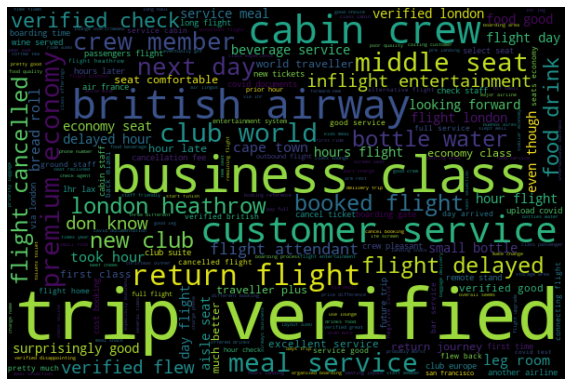

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

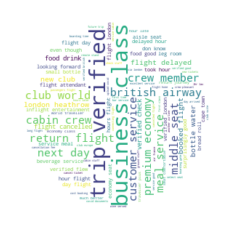

In [38]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

Frequency distributions

In [39]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [40]:
fd.most_common(3)

[('flight', 3280), ('verified', 2020), ('trip', 1660)]

In [41]:
fd.tabulate(3)

  flight verified     trip 
    3280     2020     1660 


In [42]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

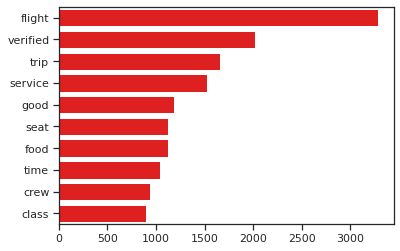

In [43]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='red');

In [44]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

Sentiment analysis

In [45]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [47]:
df['polarity'] = df[columns].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,reviews,polarity
1997,trip verified holidays ruined suitcases lost f...,"{'neg': 0.206, 'neu': 0.697, 'pos': 0.096, 'co..."
1998,trip verified despite promise credit double ti...,"{'neg': 0.105, 'neu': 0.659, 'pos': 0.236, 'co..."
1999,trip verified refund process non responsive fo...,"{'neg': 0.08, 'neu': 0.797, 'pos': 0.123, 'com..."


changing structure


In [49]:
df = pd.concat(
    [df.drop(['polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,reviews,neg,neu,pos,compound
0,trip verified organised boarding process reall...,0.000,0.493,0.507,0.9371
1,trip verified outward journey ba245 london bue...,0.100,0.778,0.122,0.3182
2,trip verified check agent lhr helpful friendly...,0.284,0.418,0.299,0.2516


Getting sentiment from score

In [51]:

df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,reviews,neg,neu,pos,compound,sentiment
0,trip verified organised boarding process reall...,0.000,0.493,0.507,0.9371,positive
1,trip verified outward journey ba245 london bue...,0.100,0.778,0.122,0.3182,positive
2,trip verified check agent lhr helpful friendly...,0.284,0.418,0.299,0.2516,positive
3,trip verified disappointing book fly day retur...,0.123,0.784,0.093,-0.1531,negative


Analyze data

In [52]:
df.loc[df['compound'].idxmax()].values

array(['trip verified british airways flag carrier used check staff club europe area display premium service provide good overall service galleries south lounge busy food good good array salads pasta bread hot food available festive turkey ham pie particularly good flight delayed lhr busy tuesday evening boarding process stressful due lack queue management system majority passengers congregating around gate despite using group system board took almost 1hr board 240 passengers flight good good club meal service bar service good seems done away champagne board also lounge menu handed prior departure good food offering length flight food good beef cheek served vegetables chosen always excelled catering changed seat standard economy seat table middle seat club europe standard practice seat comfortable limited leg room cabin clean presentable tidy issues a321 featured contains good landing page flight information access speedbird cafe menu access com good pricing strategy wither messaging s

In [53]:
df.loc[df['compound'].idxmin()].values

array(['trip verified boarded flight edinburgh london connecting flight san francisco 4th october lot americas heading back america scotland open golf andrews woman counter rude actually embarrassed british time shouting snapping people real horrible way her flight london san francisco prior hour check spent 150 reserve two seats life time holiday america boarded evident seat sitting broken recliner button working pushed frame arm rest asked flight attendant time anything could done also rude seemed uninterested fact going sit hours flight seat recline eventually got flight state would report fault find multiple seats economy seating area also broken attitude british airways staff absolutely horrendous getting flight decided make complaint british airways bearing mind paid 150 privilege picking seat asked refund cost booking seat prior hour check told refunds paid product broken met nothing rude staff telling can refund cost booking seat emails customer team still refusing also refusin

Visualize data

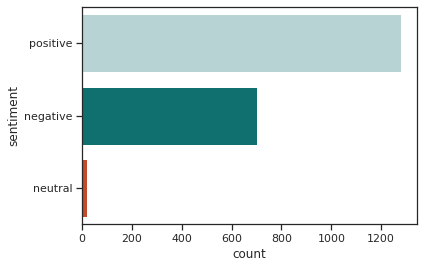

In [54]:
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

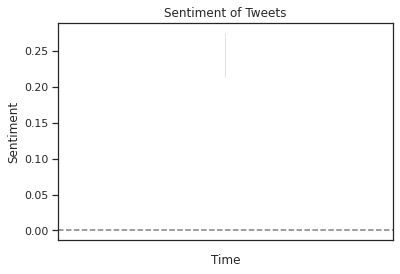

In [59]:
# Lineplot
g = sns.lineplot(x=2000, y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

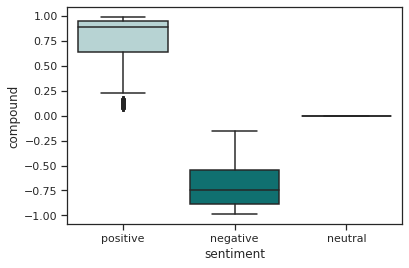

In [60]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);